In [36]:
#pre installed needed packages (Using pip command)
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [37]:
#load the dataset needed for the model and assign a variable to call  that dataset
df= pd. read_excel("Data_Train.xlsx")    

In [38]:
df.info()  # prints whats the data type of provided dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [39]:
df.head() # display the first few rows (5) of the dataframe


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [40]:
df.isnull().sum  # see the null values of dataset

<bound method DataFrame.sum of        Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  \
0        False            False   False        False  False     False   
1        False            False   False        False  False     False   
2        False            False   False        False  False     False   
3        False            False   False        False  False     False   
4        False            False   False        False  False     False   
...        ...              ...     ...          ...    ...       ...   
10678    False            False   False        False  False     False   
10679    False            False   False        False  False     False   
10680    False            False   False        False  False     False   
10681    False            False   False        False  False     False   
10682    False            False   False        False  False     False   

       Arrival_Time  Duration  Total_Stops  Additional_Info  Price  
0             False    

In [41]:
#Dealing with date and time features

df["journey_Day"]=pd.to_datetime(df.Date_of_Journey , format="%d/%m/%Y").dt.day
df["journey_Date"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [43]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Day,journey_Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [44]:
df.drop(["Additional_Info","Date_of_Journey"], axis=1, inplace=True)

In [45]:
df["Dep_hour"]=pd.to_datetime(df.Dep_Time).dt.hour
df["Dep_minute"]=pd.to_datetime(df.Dep_Time).dt.minute

C:\Users\saica\AppData\Local\Temp\ipykernel_37400\3492709436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_hour"]=pd.to_datetime(df.Dep_Time).dt.hour
C:\Users\saica\AppData\Local\Temp\ipykernel_37400\3492709436.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_minute"]=pd.to_datetime(df.Dep_Time).dt.minute


In [46]:
df.drop(["Dep_Time"], axis=1, inplace=True)

In [47]:
df["Arrival_hour"]=pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival _minute"]=pd.to_datetime(df.Arrival_Time).dt.minute

C:\Users\saica\AppData\Local\Temp\ipykernel_37400\524093381.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_hour"]=pd.to_datetime(df.Arrival_Time).dt.hour
C:\Users\saica\AppData\Local\Temp\ipykernel_37400\524093381.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival _minute"]=pd.to_datetime(df.Arrival_Time).dt.minute


In [48]:

df.drop(["Route"], axis=1, inplace=True)

In [49]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,journey_Day,journey_Date,Dep_hour,Dep_minute,Arrival_hour,Arrival _minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,1,3,16,50,21,35


In [50]:
df["Hours"]=df["Duration"].str.extract(r'(\d+)h').astype(float)
df["Minutes"]=df["Duration"].str.extract(r'(\d+)m').astype(float)

In [51]:
df.head()


,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,journey_Day,journey_Date,Dep_hour,Dep_minute,Arrival_hour,Arrival _minute,Hours,Minutes
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10,2.0,50.0
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,1,5,5,50,13,15,7.0,25.0
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,9,6,9,25,4,25,19.0,NaN
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,12,5,18,5,23,30,5.0,25.0
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,1,3,16,50,21,35,4.0,45.0


In [52]:
df["Duration_in_minutes"]=df["Hours"]*60+df["Minutes"]

In [53]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,journey_Day,journey_Date,Dep_hour,Dep_minute,Arrival_hour,Arrival _minute,Hours,Minutes,Duration_in_minutes
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10,2.0,50.0,170.0
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,1,5,5,50,13,15,7.0,25.0,445.0
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,9,6,9,25,4,25,19.0,NaN,NaN
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,12,5,18,5,23,30,5.0,25.0,325.0
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,1,3,16,50,21,35,4.0,45.0,285.0


In [54]:
df.drop(["Duration", "Hours","Minutes"], axis=1, inplace=True)

In [55]:
df.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,journey_Day,journey_Date,Dep_hour,Dep_minute,Arrival_hour,Arrival _minute,Duration_in_minutes
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,non-stop,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,13:15,2 stops,7662,1,5,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,2 stops,13882,9,6,9,25,4,25,NaN
3,IndiGo,Kolkata,Banglore,23:30,1 stop,6218,12,5,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,21:35,1 stop,13302,1,3,16,50,21,35,285.0


In [56]:
df.drop(["Arrival_Time"], axis=1, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              10683 non-null  object 
 1   Source               10683 non-null  object 
 2   Destination          10683 non-null  object 
 3   Total_Stops          10682 non-null  object 
 4   Price                10683 non-null  int64  
 5   journey_Day          10683 non-null  int32  
 6   journey_Date         10683 non-null  int32  
 7   Dep_hour             10683 non-null  int32  
 8   Dep_minute           10683 non-null  int32  
 9   Arrival_hour         10683 non-null  int32  
 10  Arrival _minute      10683 non-null  int32  
 11  Duration_in_minutes  9651 non-null   float64
dtypes: float64(1), int32(6), int64(1), object(4)
memory usage: 751.3+ KB


In [58]:
#categorical values
1.# Nominal data: data are not in any order. One hot encoding is used in this case
2. #Ordinal data: data are in order. Label Encoding is used in this case

2.0

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["Total_Stops"] = le.fit_transform(df["Total_Stops"])

df.head()


,Airline,Source,Destination,Total_Stops,Price,journey_Day,journey_Date,Dep_hour,Dep_minute,Arrival_hour,Arrival _minute,Duration_in_minutes
0,IndiGo,Banglore,New Delhi,4,3897,24,3,22,20,1,10,170.0
1,Air India,Kolkata,Banglore,1,7662,1,5,5,50,13,15,445.0
2,Jet Airways,Delhi,Cochin,1,13882,9,6,9,25,4,25,NaN
3,IndiGo,Kolkata,Banglore,0,6218,12,5,18,5,23,30,325.0
4,IndiGo,Banglore,New Delhi,0,13302,1,3,16,50,21,35,285.0


In [60]:
#use pd.get_dummies to convert categorical data into dummy or indicator variables
df = pd.get_dummies(df, columns=["Airline", "Source", "Destination"], drop_first=True)



In [61]:
df.head()

,Total_Stops,Price,journey_Day,journey_Date,Dep_hour,Dep_minute,Arrival_hour,Arrival _minute,Duration_in_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,170.0,False,...,False,False,False,False,False,False,False,False,False,True
1,1,7662,1,5,5,50,13,15,445.0,True,...,False,False,False,True,False,False,False,False,False,False
2,1,13882,9,6,9,25,4,25,NaN,False,...,False,False,True,False,False,True,False,False,False,False
3,0,6218,12,5,18,5,23,30,325.0,False,...,False,False,False,True,False,False,False,False,False,False
4,0,13302,1,3,16,50,21,35,285.0,False,...,False,False,False,False,False,False,False,False,False,True


In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10683 non-null  int64  
 1   Price                                      10683 non-null  int64  
 2   journey_Day                                10683 non-null  int32  
 3   journey_Date                               10683 non-null  int32  
 4   Dep_hour                                   10683 non-null  int32  
 5   Dep_minute                                 10683 non-null  int32  
 6   Arrival_hour                               10683 non-null  int32  
 7   Arrival _minute                            10683 non-null  int32  
 8   Duration_in_minutes                        9651 non-null   float64
 9   Airline_Air India                          10683 non-null  bool   
 10  Airline_GoAir         

In [63]:
bool_colms=df.select_dtypes(include=bool).columns

In [64]:
bool_colms

Index(['Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [65]:
#chnging boolean values to integer values
for col in bool_colms:
    df[col]=df[col].astype(int)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10683 non-null  int64  
 1   Price                                      10683 non-null  int64  
 2   journey_Day                                10683 non-null  int32  
 3   journey_Date                               10683 non-null  int32  
 4   Dep_hour                                   10683 non-null  int32  
 5   Dep_minute                                 10683 non-null  int32  
 6   Arrival_hour                               10683 non-null  int32  
 7   Arrival _minute                            10683 non-null  int32  
 8   Duration_in_minutes                        9651 non-null   float64
 9   Airline_Air India                          10683 non-null  int64  
 10  Airline_GoAir         

In [67]:
df.head()

,Total_Stops,Price,journey_Day,journey_Date,Dep_hour,Dep_minute,Arrival_hour,Arrival _minute,Duration_in_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,170.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,7662,1,5,5,50,13,15,445.0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,13882,9,6,9,25,4,25,NaN,0,...,0,0,1,0,0,1,0,0,0,0
3,0,6218,12,5,18,5,23,30,325.0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,13302,1,3,16,50,21,35,285.0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
#seperating the training and testing data
# Separating the training and testing data
df_train = df[~df["Price"].isnull()]  # Training data (Price is not null)
df_train= df[df["Price"].isnull()]    # Testing data (Price is null)


In [75]:
x=df_train.drop("Price", axis=1)
y=df_train["Price"]

In [76]:
y.head()

Series([], Name: Price, dtype: int64)

In [85]:
# Clean the dataset
df_clean = df.dropna(subset=['Price'])  # Ensure no missing values in 'Price'

# Split into features and target
x = df_clean.drop('Price', axis=1)
y = df_clean['Price']

# Verify that we have data
print(x.shape)  # Should show (n_samples, 28)
print(y.shape)  # Should show (n_samples,)

# Now, you can fit the model
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x, y)


(10683, 28)
(10683,)


ExtraTreesRegressor()

In [86]:
print(etr.feature_importances_)  # The higher, the more important the feature

[3.59184168e-01 1.44132046e-01 5.34657665e-02 2.83606905e-02
 2.58231868e-02 3.15226497e-02 2.20820305e-02 3.61483744e-02
 8.78963416e-03 1.62011863e-03 2.33204484e-02 1.13058829e-01
 6.54004539e-02 1.65558122e-02 9.14452492e-04 3.15292344e-03
 1.44519127e-04 5.20769752e-03 7.17640292e-05 4.34093789e-04
 9.11819799e-03 3.43195804e-03 5.87141067e-03 7.10506214e-03
 4.85329674e-03 4.97799472e-03 4.83328479e-04 2.47690922e-02]


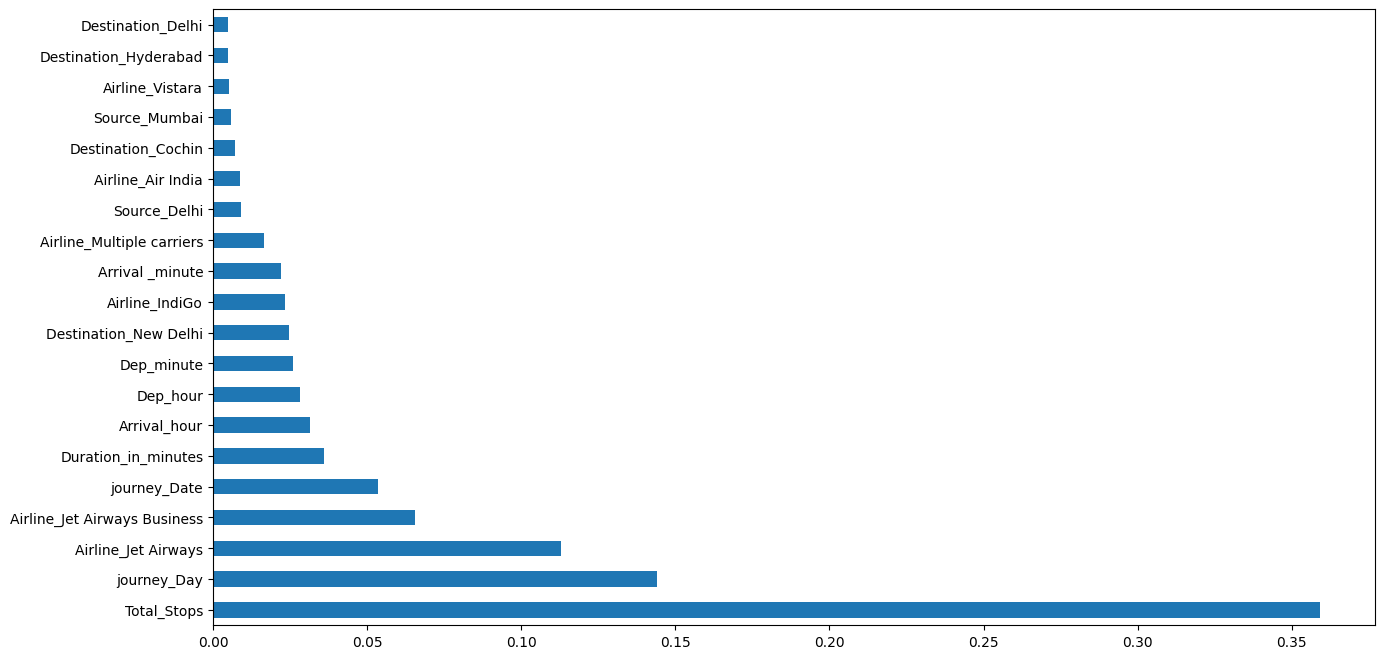

In [88]:
# Plot the feature importances
plt.figure(figsize=(15,8))
feat_import = pd.Series(etr.feature_importances_, index=x.columns)
feat_import.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
##fitting the model using Random Forest Regressor
1. split the def_train data into training and testing data
2.do the scaling of the data
3. import the Random Forest Regressor
4.fit the model
5.predit the outcomes
6. evaluate the model

In [90]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [91]:
#import the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [92]:
rf.score(x_train, y_train)

0.9535858303791999

In [93]:
rf.score(x_test, y_test)

0.8312300976028966

In [94]:
y_pred=rf.predict(x_test)

In [100]:
from sklearn.metrics import mean_squared_error

In [102]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print RMSE
print("RMSE:", rmse)


RMSE: 1889.9313441373301


In [106]:
import pickle
file = open('flight_rf.pkl', 'wb')
pickle.dump(rf, file)

In [107]:
model= open('flight_rf.pkl','rb')
forest=pickle.load(model)

In [108]:
y_pred_pkl=forest.predict(x_test)

In [111]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the RandomForest model
rf_random = RandomForestRegressor()
rf_random.fit(x_train, y_train)

# Make predictions on the test data
prediction = rf_random.predict(x_test)

# Check the predictions
print(prediction)


[13768.9695  5433.91   12537.561  ...  6536.6     4802.2    11636.545 ]
